## Assignment-12 : Apply Keras on MNIST DataSet

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plot_loss(x, vy, ty, xlabel='Epoch', ylabel='Categorical Crossentropy Loss'):
         _, = plt.plot(x, vy, 'b', label="Validation Loss")
         _, = plt.plot(x, ty, 'r', label="Train Loss")
         plt.xlabel(xlabel)
         plt.ylabel(ylabel)
  
         plt.grid()
         plt.legend()
         plt.grid()
         plt.show()
    

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [8]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

**Multi-Layer Perceptron With 2 hidden layer**

**1. MLP + Relu Activation + Adam Optimizer  (H1: 720 , H2 : 200)**

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation,Dropout, BatchNormalization

In [13]:
%%time
def Build_NN_2(input_dim, output_dim=10):
  model = Sequential()
  model.add(Dense(720, activation='relu', kernel_initializer='he_normal', input_shape=(input_dim,)))
  
  model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
  
  model.add(Dense(output_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 23.8 µs


In [17]:
model=Build_NN_2(input_dim)
print()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.3, verbose=1)


W0713 10:20:14.764899 140220561528704 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 720)               565200    
_________________________________________________________________
dense_11 (Dense)             (None, 200)               144200    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2010      
Total params: 711,410
Trainable params: 711,410
Non-trainable params: 0
_________________________________________________________________
None

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 5s 127us/step - loss: 0.2554 - acc: 0.9246 - val_loss: 0.1375 - val_acc: 0.9583
Epoch 2/20
42000/42000 [==============================] - 1s 34us/step - loss: 0.0917 - acc: 0.9724 - val_loss: 0.1157 - val_acc: 0.9638
Epoch 3/20
42000/42000 [==============================] - 1s 34us/ste

**Plot**

Test Score: 0.11015889572340877
Test Accuracy: 0.9787



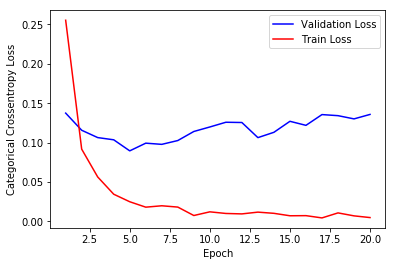

In [32]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')


x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)-

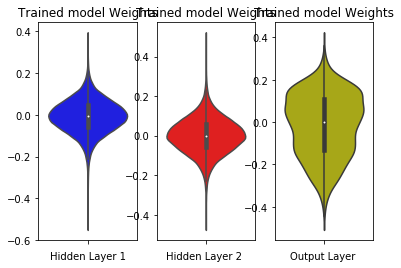

In [33]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**2. MLP + Relu Activation + Adam Optimizer + Batch Normalization (H1: 720 , H2: 200 )**

In [34]:
%%time
def Build_NN_2(input_dim, output_dim=10):
  model = Sequential()
  model.add(Dense(720, activation='relu', kernel_initializer='he_normal', input_shape=(input_dim,)))
  model.add(BatchNormalization())
  
  model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  
  model.add(Dense(output_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 12.6 µs


In [37]:
model=Build_NN_2(input_dim)
print()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.3, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 720)               565200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 720)               2880      
_________________________________________________________________
dense_15 (Dense)             (None, 200)               144200    
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2010      
Total params: 715,090
Trainable params: 713,250
Non-trainable params: 1,840
_________________________________________________________________
None

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 3s 74us/step - los

Test Score: 0.08973172496785191
Test Accuracy: 0.9797



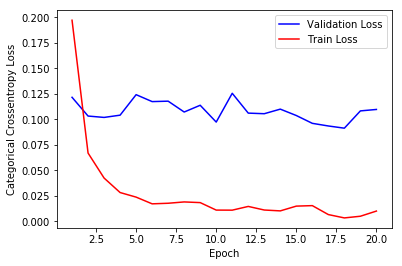

In [38]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')


x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

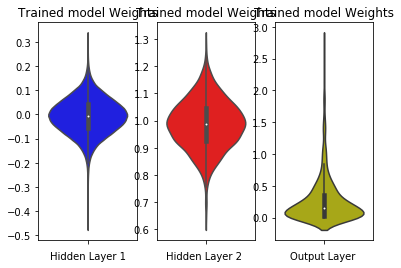

In [39]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**3. MLP + Relu Activation + Adam Optimizer + Dropout (H1: 720 , H2: 200)**

In [40]:
%%time
def Build_NN_2(input_dim, output_dim=10):
  model = Sequential()
  
  model.add(Dense(720, activation='relu', kernel_initializer='he_normal', input_shape=(input_dim,)))
  model.add(Dropout(0.5))
  
  
  model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
  model.add(Dropout(0.5))
  
  
  model.add(Dense(output_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.63 µs


In [41]:
model=Build_NN_2(input_dim)
print()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.3, verbose=1)

W0713 10:58:05.901090 140220561528704 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 720)               565200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 720)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               144200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2010      
Total params: 711,410
Trainable params: 711,410
Non-trainable params: 0
_________________________________________________________________
None

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 2s 53us/step - loss: 0

Test Score: 0.07207091313775582
Test Accuracy: 0.9807



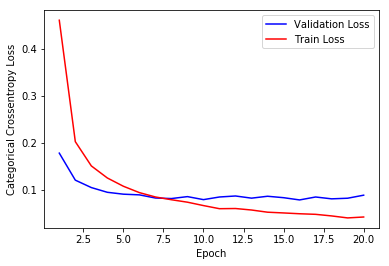

In [43]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')


x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

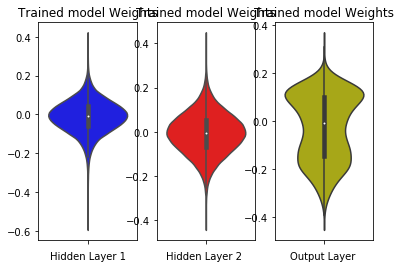

In [44]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**4. MLP + Relu Activation + Adam Optimizer + Batch Normalization + Dropout (H1: 720 , H2: 200)**

In [45]:
%%time
def Build_NN_2(input_dim, output_dim=10):
  model = Sequential()
  model.add(Dense(720, activation='relu', kernel_initializer='he_normal', input_shape=(input_dim,)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(output_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 16.5 µs


In [46]:
model=Build_NN_2(input_dim)
print()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.3, verbose=1)
print()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 720)               565200    
_________________________________________________________________
batch_normalization_3 (Batch (None, 720)               2880      
_________________________________________________________________
dropout_3 (Dropout)          (None, 720)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 200)               144200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 200)               800       
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2010      
Total para

Test Score: 0.06645472465842323
Test Accuracy: 0.9822



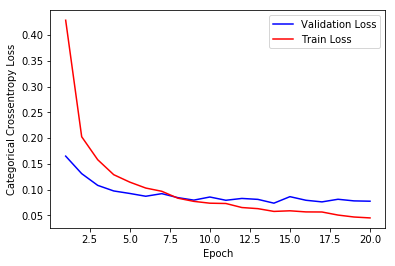

In [47]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')


x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

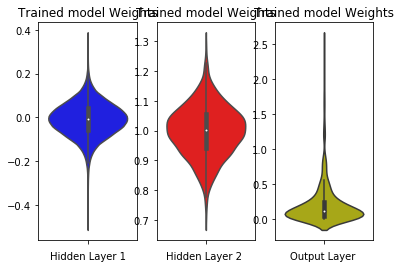

In [48]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Multi-Layer Perceptron With 3 hidden layer**

**1. MLP + Relu Activation + Adam Optimizer (H1: 700 , H2 : 360 , H3: 180)**

In [49]:
%%time
def Build_NN_3(input_dim, output_dim=10):
  model = Sequential()
  
  model.add(Dense(700, activation='relu', kernel_initializer='he_normal', input_shape=(input_dim,)))
  
  model.add(Dense(360, activation='relu', kernel_initializer='he_normal'))
 
  model.add(Dense(180, activation='relu', kernel_initializer='he_normal'))
  
  
  model.add(Dense(output_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs


In [57]:
model=Build_NN_3(input_dim)
print()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.3, verbose=1)
print()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 700)               549500    
_________________________________________________________________
batch_normalization_9 (Batch (None, 700)               2800      
_________________________________________________________________
dense_30 (Dense)             (None, 360)               252360    
_________________________________________________________________
batch_normalization_10 (Batc (None, 360)               1440      
_________________________________________________________________
dense_31 (Dense)             (None, 180)               64980     
_________________________________________________________________
batch_normalization_11 (Batc (None, 180)               720       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1810      
Total para

Test Score: 0.09005934175993825
Test Accuracy: 0.981



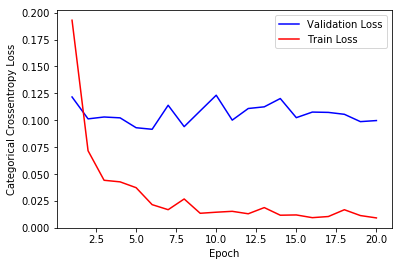

In [58]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')


x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

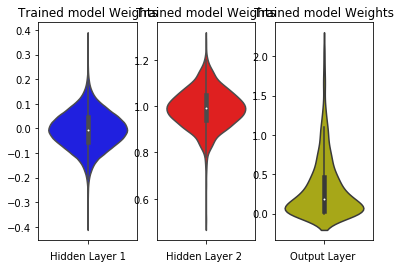

In [59]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**2. MLP + Relu Activation + Adam Optimizer + Batch Normalization (H1: 700 , H2: 360 , H3: 180)**

In [60]:
%%time
def Build_NN_3(input_dim, output_dim=10):
  model = Sequential()
  
  model.add(Dense(700, activation='relu', kernel_initializer='he_normal', input_shape=(input_dim,)))
  model.add(BatchNormalization())
  
  model.add(Dense(360, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
 
  model.add(Dense(180, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  
  
  model.add(Dense(output_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 14.3 µs


In [61]:
model=Build_NN_3(input_dim)
print()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.3, verbose=1)
print()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 700)               549500    
_________________________________________________________________
batch_normalization_12 (Batc (None, 700)               2800      
_________________________________________________________________
dense_34 (Dense)             (None, 360)               252360    
_________________________________________________________________
batch_normalization_13 (Batc (None, 360)               1440      
_________________________________________________________________
dense_35 (Dense)             (None, 180)               64980     
_________________________________________________________________
batch_normalization_14 (Batc (None, 180)               720       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1810      
Total para

Test Score: 0.08819649735184722
Test Accuracy: 0.9787



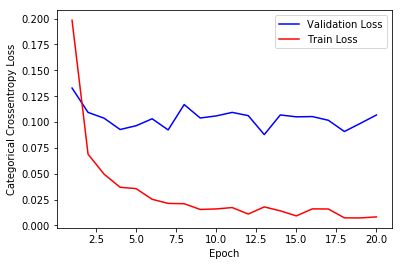

In [62]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')


x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

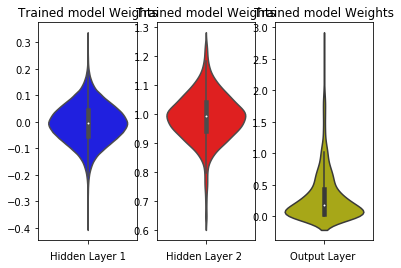

In [63]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**3. MLP + Relu Activation + Adam Optimizer + Dropout (H1: 700 , H2: 360 , H3: 180)**

In [64]:
%time
def Build_NN_3(input_dim, output_dim=10):
  model = Sequential()
  
  model.add(Dense(700, activation='relu', kernel_initializer='he_normal', input_shape=(input_dim,)))
  
  model.add(Dense(360, activation='relu', kernel_initializer='he_normal'))
 
  model.add(Dense(180, activation='relu', kernel_initializer='he_normal'))
  
  
  model.add(Dense(output_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


In [65]:
model=Build_NN_3(input_dim)
print()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.3, verbose=1)
print()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 700)               549500    
_________________________________________________________________
dense_38 (Dense)             (None, 360)               252360    
_________________________________________________________________
dense_39 (Dense)             (None, 180)               64980     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                1810      
Total params: 868,650
Trainable params: 868,650
Non-trainable params: 0
_________________________________________________________________
None

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 3s 72us/step - loss: 0.2423 - acc: 0.9256 - val_loss: 0.1264 - val_acc: 0.9612
Epoch 2/20
42000/42000 [==============================] - 2s 39us/step - lo

Test Score: 0.11028124448086878
Test Accuracy: 0.9769



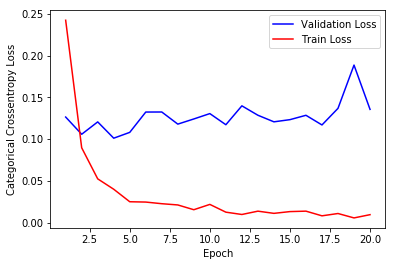

In [66]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')


x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

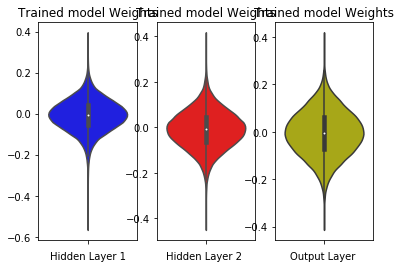

In [67]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**4. MLP + Relu Activation + Adam Optimizer + Batch Normalization + Dropout (H1: 700 , H2: 360 , H3: 180)**

In [0]:
def Build_NN_3(input_dim, output_dim=10):
  model = Sequential()
  model.add(Dense(720, activation='relu', kernel_initializer='he_normal', input_shape=(input_dim,)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  model.add(Dense(output_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

In [69]:
model=Build_NN_3(input_dim)
print()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.3, verbose=1)
print()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 720)               565200    
_________________________________________________________________
batch_normalization_15 (Batc (None, 720)               2880      
_________________________________________________________________
dropout_9 (Dropout)          (None, 720)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 200)               144200    
_________________________________________________________________
batch_normalization_16 (Batc (None, 200)               800       
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                2010      
Total para

Test Score: 0.06508726586559788
Test Accuracy: 0.9819



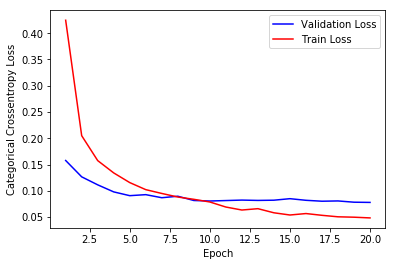

In [70]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')


x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

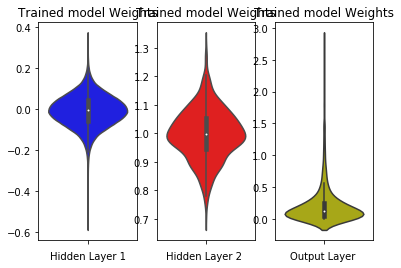

In [71]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Multi-Layer Perceptron With 5 hidden layer**

**1. MLP + Relu Activation + Adam Optimizer (H1: 720 , H2 : 360 , H3: 180 , H4: 90 , H5: 45)**

In [72]:
%%time
def Build_NN_5(input_dim, output_dim=10):
  model = Sequential()
  
  model.add(Dense(720, activation='relu', kernel_initializer='he_normal', input_shape=(input_dim,)))
 
  model.add(Dense(360, activation='relu', kernel_initializer='he_normal'))
  
  model.add(Dense(180, activation='relu', kernel_initializer='he_normal'))
  
  model.add(Dense(90, activation='relu', kernel_initializer='he_normal'))
  
  model.add(Dense(45, activation='relu', kernel_initializer='he_normal'))
  
  model.add(Dense(output_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs


In [73]:
model=Build_NN_5(input_dim)
print()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.3, verbose=1)
print()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 720)               565200    
_________________________________________________________________
dense_45 (Dense)             (None, 360)               259560    
_________________________________________________________________
dense_46 (Dense)             (None, 180)               64980     
_________________________________________________________________
dense_47 (Dense)             (None, 90)                16290     
_________________________________________________________________
dense_48 (Dense)             (None, 45)                4095      
_________________________________________________________________
dense_49 (Dense)             (None, 10)                460       
Total params: 910,585
Trainable params: 910,585
Non-trainable params: 0
_________________________________________________________________
None

Test Score: 0.08912124511943212
Test Accuracy: 0.9823



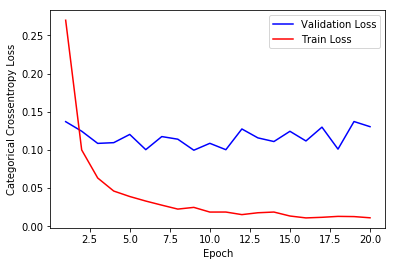

In [74]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')


x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

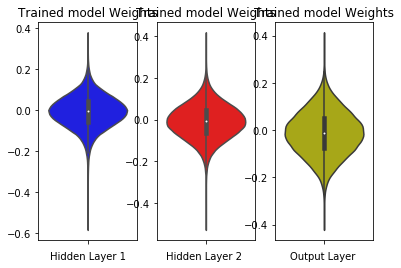

In [75]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**2. MLP + Relu Activation + Adam Optimizer + Batch Normalization (H1: 720 , H2 : 360 , H3: 180 , H4: 90 , H5: 45)**

In [76]:
%%time
def Build_NN_5(input_dim, output_dim=10):
  model = Sequential()
  
  model.add(Dense(720, activation='relu', kernel_initializer='he_normal', input_shape=(input_dim,)))
  model.add(BatchNormalization())
 
  model.add(Dense(360, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  
  model.add(Dense(180, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  
  model.add(Dense(90, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  
  model.add(Dense(45, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  
  model.add(Dense(output_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

CPU times: user 0 ns, sys: 9 µs, total: 9 µs
Wall time: 13.1 µs


In [77]:
model=Build_NN_5(input_dim)
print()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.3, verbose=1)
print()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 720)               565200    
_________________________________________________________________
batch_normalization_17 (Batc (None, 720)               2880      
_________________________________________________________________
dense_51 (Dense)             (None, 360)               259560    
_________________________________________________________________
batch_normalization_18 (Batc (None, 360)               1440      
_________________________________________________________________
dense_52 (Dense)             (None, 180)               64980     
_________________________________________________________________
batch_normalization_19 (Batc (None, 180)               720       
_________________________________________________________________
dense_53 (Dense)             (None, 90)                16290     
__________

Test Score: 0.09106637627696619
Test Accuracy: 0.9772



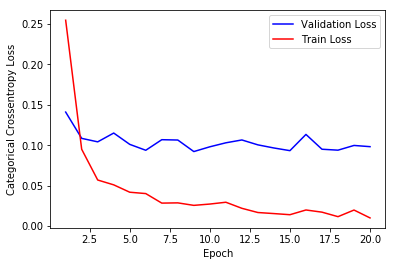

In [78]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')


x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

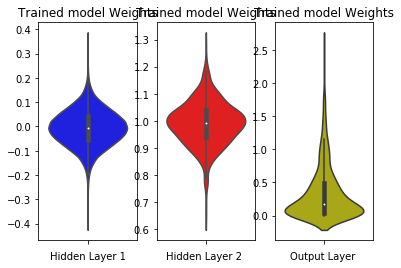

In [79]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**3. MLP + Relu Activation + Adam Optimizer + Dropout (H1: 720 , H2: 360 , H3: 180 , H4: 90 , H5: 45)**

In [80]:
%%time
def Build_NN_5(input_dim, output_dim=10):
  model = Sequential()
  
  model.add(Dense(720, activation='relu', kernel_initializer='he_normal', input_shape=(input_dim,)))
  model.add(Dropout(0.5))
 
  model.add(Dense(360, activation='relu', kernel_initializer='he_normal'))
  model.add(Dropout(0.5))
  
  model.add(Dense(180, activation='relu', kernel_initializer='he_normal'))
  model.add(Dropout(0.5))
  
  model.add(Dense(90, activation='relu', kernel_initializer='he_normal'))
  model.add(Dropout(0.5))
  
  model.add(Dense(45, activation='relu', kernel_initializer='he_normal'))
  model.add(Dropout(0.5))
  
  model.add(Dense(output_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.78 µs


In [81]:
model=Build_NN_5(input_dim)
print()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.3, verbose=1)
print()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 720)               565200    
_________________________________________________________________
dropout_11 (Dropout)         (None, 720)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 360)               259560    
_________________________________________________________________
dropout_12 (Dropout)         (None, 360)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 180)               64980     
_________________________________________________________________
dropout_13 (Dropout)         (None, 180)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 90)                16290     
__________

Test Score: 0.11893713512013138
Test Accuracy: 0.9776



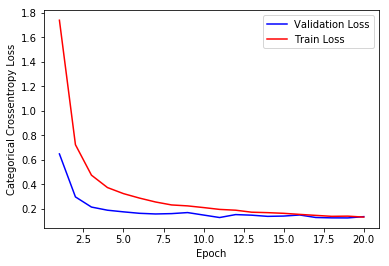

In [82]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')


x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

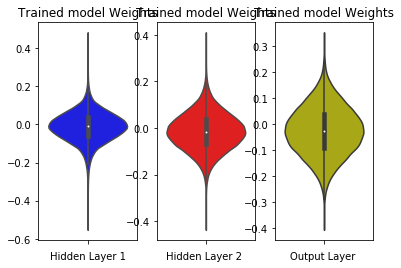

In [83]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**4. MLP + Relu Activation + Adam Optimizer + Batch Normalization + Dropout (H1: 720 , H2: 360 , H3: 180 , H4: 180 , H5: 45)**

In [84]:
%%time
def Build_NN_5(input_dim, output_dim=10):
  model = Sequential()
  
  model.add(Dense(720, activation='relu', kernel_initializer='he_normal', input_shape=(input_dim,)))
  model.add(BatchNormalization()) 
  model.add(Dropout(0.5))
 
  model.add(Dense(360, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization()) 
  model.add(Dropout(0.5))
  
  model.add(Dense(180, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization()) 
  model.add(Dropout(0.5))
  
  model.add(Dense(90, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization()) 
  model.add(Dropout(0.5))
  
  model.add(Dense(45, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization()) 
  model.add(Dropout(0.5))
  
  model.add(Dense(output_dim, activation='softmax'))

  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())

  return model

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 11.4 µs


In [85]:
model=Build_NN_5(input_dim)
print()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.3, verbose=1)
print()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 720)               565200    
_________________________________________________________________
batch_normalization_22 (Batc (None, 720)               2880      
_________________________________________________________________
dropout_16 (Dropout)         (None, 720)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 360)               259560    
_________________________________________________________________
batch_normalization_23 (Batc (None, 360)               1440      
_________________________________________________________________
dropout_17 (Dropout)         (None, 360)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 180)               64980     
__________

Test Score: 0.08941399474844802
Test Accuracy: 0.9788



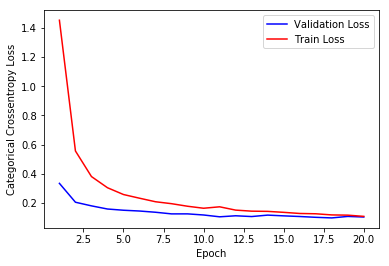

In [86]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}\n')


x = list(range(1, nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plot_loss(x, vy, ty)

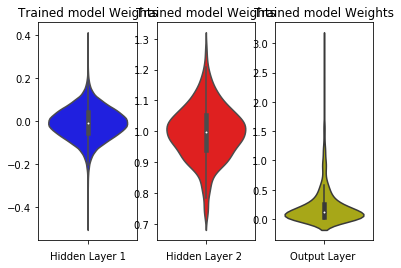

In [87]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Conclusion 

1. I have tried 3 diffrent architecture having layers 2 , 3 and 5 respectively.

2. Subsequent increase in depth of the Network (3 and 5 Hidden Layers) shows not much improvement in the Test Accuracy.

3. Also, the Crossover point between Train and Validation Loss is increasing as the Networks depth increases. This is evident from the Loss vs Epoch curves.